###### Задание r2z2: Вариант Z4 (Критерий согласия хи-квадрат)
- α = 0.1
- H0: X ∼ N (µ = 0, σ2 = 1.5)

Проверка статистических гипотез о типе распределения
"В этом задании требуется произвести проверку гипотезы для предоставленной выборки о типе
её распределения. К каждому из заданий прилагаются дополнительные параметры
(гипотеза H0 и уровень значимости α). По общей теории проверок статистических гипотез см. [1],
п.3."
###### Что нужно сделать
Для заданных параметров:
- построить гистограмму выборки с наложением графика функции плотности предполагаемого
распределения (для критерия хи-квадрат), либо график ЭФР с наложением графика функции
распределения предполагаемого распределения (для критерия Колмогорова);
- определить вид критической области и вычислить критическую константу;
- вычислить статистику и сделать вывод о принятии либо отклонении гипотезы;
- вычислить p-значение

In [3]:
import csv
with open("datatest/r2z2.csv", encoding='utf-8') as r_file:
    file_reader = csv.reader(r_file, delimiter = ",")
    x = []
    n = 0
    for row in file_reader:
        if n > 0:
            x.append(float(row[0]))
        n+=1
    n-=1

FileNotFoundError: [Errno 2] No such file or directory: 'datatest/r2z2.csv'

In [ ]:
x.sort()
print("Объем выборки:  ", n)
print("Минимум:        ", x[0])
print("Максимум:       ", x[n-1])
print("Размах:         ", round(x[n-1] - x[0],3))

Объем выборки:   70
Минимум:         -2.01673976490714
Максимум:        3.11696304829937
Размах:          5.134


In [ ]:
import math

def normal(x, M, sigma):
    return (1./math.sqrt(sigma*2*math.pi))*math.exp(-((M - x)**2)/(2*sigma))

from scipy import integrate

def normal_cdf(M, sigma, a,b):
    v, err = integrate.quad(normal, a, b, args = (M,sigma))
    return v

def vk(data, start, end):
    count = 0
    for i in x:
        if (start < i <= end):
            count += 1
    return count

[1, 8, 10, 23, 19, 5, 3]
Kрит значение 14.684 
p-значение    0.00232 
Cтатистика    25.666
	p < 0.1 ---> Гипотеза отвергается
Power_divergenceResult(statistic=114.80906904462944, pvalue=7.29722512818998e-05)


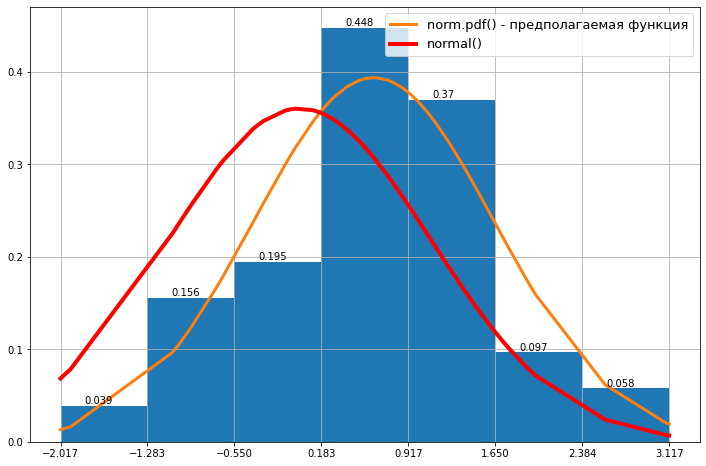

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import statsmodels as sm
from scipy.stats import norm

# выборочное среднее
sum = 0
for i in x:
    sum += i
mean = round(sum / len(x), 3)
#print("Выборочное среднее ", mean)

#выборочная дисперсия
sum = 0
for i in x:
    sum += (i - mean)**2
disp = round(sum / len(x), 3)
#print("Выборочная дисперсия ", disp)

# Выборочное стандартное отклонение
sigma = round(math.sqrt(disp), 3)
#print("Выборочное стандартное отклонение", sigma)


fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot()
ax.xaxis.set_major_locator(plt.IndexLocator(base=0.7334, offset=0))
n, bins,pitches = ax.hist(x,bins=int(np.round(len(x)/10)), density=True)
for i in pitches:
    height = round(i.get_height(), 3)
    ax.annotate(height, (i.get_x() + 0.2, height+0.002))
ax.grid()
y = []
for i in range(len(x)):
    y.append(normal(x[i], 0, 1.5**0.5))
plt.plot(x, norm.pdf(x,loc = mean,scale = sigma), linewidth= 3,  label=r'norm.pdf() - предполагаемая функция')
plt.plot(x, y, linewidth =4, color = "r",  label=r'normal()')
plt.legend(loc='best', fontsize=13)
mean = 0
sigma = 1.5**2


phi = []
p = []
for i in range(7):
    tmp_p = normal_cdf(mean, sigma,bins[i],bins[i+1])
    tmp_vk = vk(x, bins[i],bins[i+1])
    p.append(tmp_p)
    phi.append(tmp_vk)
print(phi)
test_stat = 0
for i in range(7):
    test_stat = test_stat +  ((phi[i] - len(x)*p[i])**2)/(len(x)*p[i])
test_stat = round(test_stat, 3)
alpha = 0.1
from scipy.stats import chi2
cv = round(chi2.ppf(1 - alpha, 9), 3)
p = round(1 - chi2.cdf(test_stat, 9), 5)
print("Kрит значение",cv,
      "\np-значение   ", p,
      "\nCтатистика   ", test_stat)
if p < 0.1:
    print("\tp < 0.1 ---> Гипотеза отвергается")
else:
    print("\tp > 0.1 ---> Гипотеза принимается")

from scipy.stats import chisquare
print(chisquare(x, ddof=6))
plt.show()
